In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Dimension of train set::")
print(X_train.shape)
print(y_train.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
Dimension of train set::
(60000, 28, 28)
(60000,)


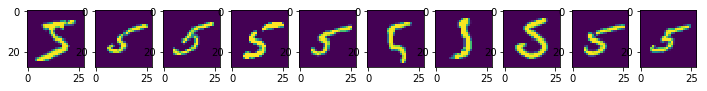

In [2]:
import numpy as np
# preview the images first
train_filter = np.where(y_train == 5 )
X1_train, Y1_train = X_train[train_filter], y_train[train_filter]
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(10):  
    plt.subplot(y, x, i+1)
    plt.imshow(X1_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

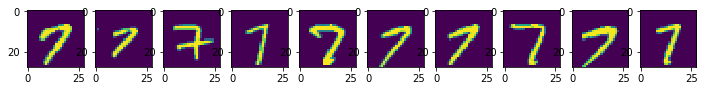

In [3]:
train_filter = np.where(y_train == 7)
X1_train, Y1_train = X_train[train_filter], y_train[train_filter]
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(10):  
    plt.subplot(y, x, i+1)
    plt.imshow(X1_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

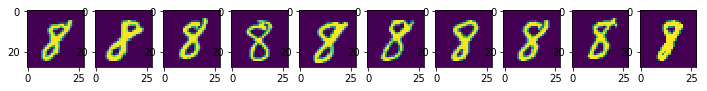

In [4]:
train_filter = np.where(y_train == 8)
X1_train, Y1_train = X_train[train_filter], y_train[train_filter]
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(10):  
    plt.subplot(y, x, i+1)
    plt.imshow(X1_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

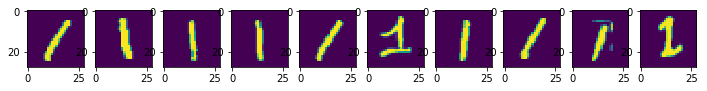

In [5]:
train_filter = np.where(y_train == 1)
X1_train, Y1_train = X_train[train_filter], y_train[train_filter]
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(10):  
    plt.subplot(y, x, i+1)
    plt.imshow(X1_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

batch_size = 100
epochs = 10
input_shape = (28, 28, 1)
num_classes = 10

In [7]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

print("Dimension of train set::")
print(X_train.shape)
print(Y_train.shape)

print("validation set shape::")
print(X_val.shape)
print(Y_val.shape)


Dimension of train set::
(48000, 28, 28)
(48000, 10)
validation set shape::
(12000, 28, 28)
(12000, 10)


In [8]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28,28,1)
X_val = X_val.reshape(-1, 28 , 28, 1)

print("Dimension of train set::")
print(X_train.shape)

print("validation set shape::")
print(X_val.shape)

print("test set shape::")
print(X_test.shape)

X_train = X_train/255.0
X_val = X_val/255.0

X_test = X_test/255.0

Dimension of train set::
(48000, 28, 28, 1)
validation set shape::
(12000, 28, 28, 1)
test set shape::
(10000, 28, 28, 1)


In [9]:
from keras.losses import categorical_crossentropy
from keras.optimizers import RMSprop

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss=categorical_crossentropy,
              optimizer=RMSprop(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dens

In [10]:
fit_params = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 269s 6ms/step - loss: 0.1784 - acc: 0.9466 - val_loss: 0.0942 - val_acc: 0.9724
Epoch 2/10
48000/48000 [==============================] - 281s 6ms/step - loss: 0.0486 - acc: 0.9856 - val_loss: 0.0419 - val_acc: 0.9888
Epoch 3/10
48000/48000 [==============================] - 272s 6ms/step - loss: 0.0351 - acc: 0.9901 - val_loss: 0.0512 - val_acc: 0.9875
Epoch 4/10
48000/48000 [==============================] - 266s 6ms/step - loss: 0.0288 - acc: 0.9921 - val_loss: 0.0421 - val_acc: 0.9904
Epoch 5/10
48000/48000 [==============================] - 266s 6ms/step - loss: 0.0241 - acc: 0.9935 - val_loss: 0.0631 - val_acc: 0.9881
Epoch 6/10
48000/48000 [==============================] - 271s 6ms/step - loss: 0.0221 - acc: 0.9947 - val_loss: 0.0654 - val_acc: 0.9897
Epoch 7/10
48000/48000 [==============================] - 263s 5ms/step - 

In [11]:
loss , acc = model.evaluate(X_val, Y_val, verbose=1)
print("loss ::", np.round(loss,2))
print("acc ::", np.round(acc,2))

12000/12000 [==============================] - 35s 3ms/step
loss :: 0.13
acc :: 0.99


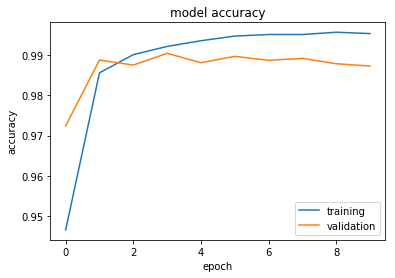

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(fit_params.history['acc'])
plt.plot(fit_params.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()